# Appendix A: plotting the vessel and equilibria, poloidal projections

For convenience, two functions are included to get the vessel structure and to plot it. the figure sizes are already set for a 1-column publication journal: 3 inches. A title suggestion is also presented for future equilibrium plots.

## Example for 1-column journal

In [19]:
from ipfnpytools.getVessel import getVessel
from ipfnpytools.plotVessel import plotVessel
import matplotlib.pyplot as plt

In [20]:
vessel = getVessel(32223)

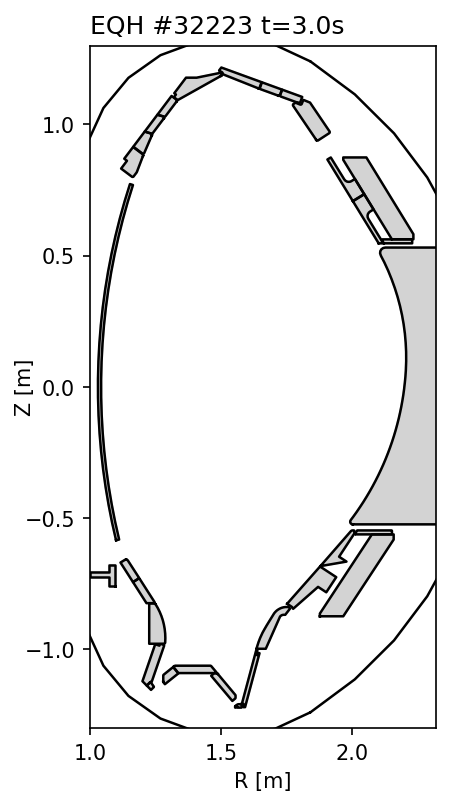

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,5.5), dpi=150)
plotVessel(vessel, ax)
ax.set_aspect('equal')
ax.set_ylabel('Z [m]', labelpad=-5)
ax.set_xlabel('R [m]')
ax.set_title('EQH #32223 t=3.0s', loc='left')
ax.set_xlim(1.0, 2.32)
ax.set_ylim(-1.3, 1.3)
plt.tight_layout()
plt.show()

Here we can see the vessel structure underwent some changes over time.

In [24]:
oldvessel = getVessel(2000)

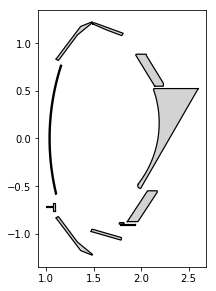

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,6))
plotVessel(oldvessel, ax)
ax.set_aspect('equal')
plt.show()    

## Equilibrium reconstructions

As an example, we shal use a siingle time instant from a pickle file. To use a contourplot, we will select some lines in the confined region and some in the SOL.

### Pickle example

In [15]:
from ipfnpytools.getVessel import getVessel
from ipfnpytools.plotVessel import plotVessel
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [24]:
shotnr = 35174
time = 4.0
magdiag = 'EQH'
vessel = getVessel(35174)

In [25]:
#with open('./Files/Equilibrium_Example.txt') as f:
fname = './Files/%s_%d.%d'%(magdiag, shotnr, time*1e3)
with open('./Files/EQH_35174.4000') as f:
    Rmesh, Zmesh, rho = pickle.load(f)

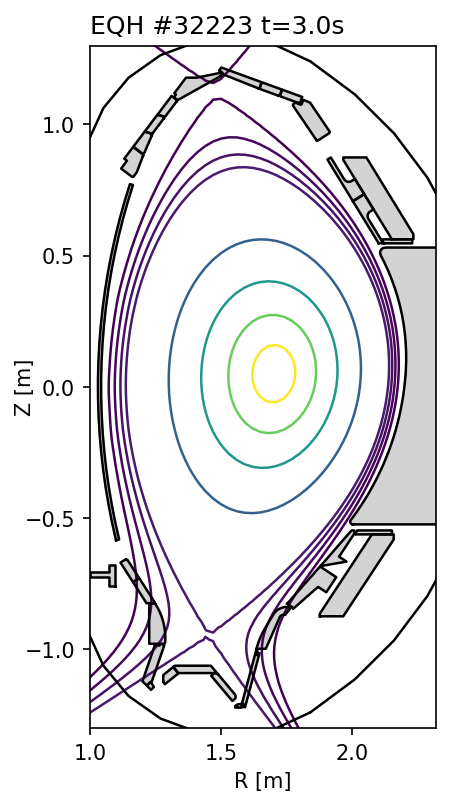

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,5.5), dpi=150)
plotVessel(vessel, ax)

contourlevels = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.02, 1.04, 1.06])

cs = ax.contour(Rmesh, Zmesh, rho,
                levels=contourlevels, linewidths=1.2, cmap='viridis_r')

ax.set_aspect('equal')
ax.set_ylabel('Z [m]', labelpad=-5)
ax.set_xlabel('R [m]')
ax.set_title('EQH #32223 t=3.0s', loc='left')
ax.set_xlim(1.0, 2.32)
ax.set_ylim(-1.3, 1.3)
plt.tight_layout()
plt.show()

## Map_Equ

If you use `Map_Equ` you will need to calculate rho poloidal. Refer to the `kk` libs manual for further explanation.

In [1]:
from ipfnpytools.getVessel import getVessel
from ipfnpytools.plotVessel import plotVessel
import matplotlib.pyplot as plt
import numpy as np
import map_equ
from ipfnpytools.closest import closest

In [2]:
shotnr = 35174
time = 4.0
magdiag = 'EQH'
vessel = getVessel(shotnr)

In [3]:
eq = map_equ.equ_map()
eq.Open(shotnr, magdiag)
#Populate the fields
eq.read_pfm()
eq.read_scalars()
#Get the index closest to the requested time
index = closest(eq.t_eq, time)

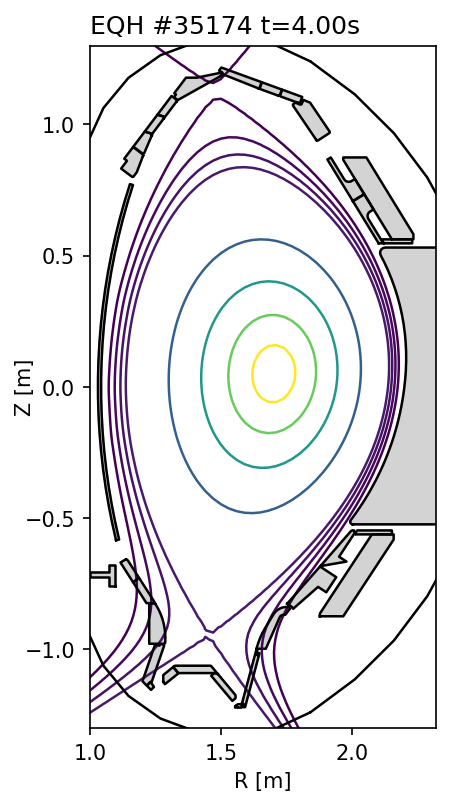

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,5.5), dpi=150)
plotVessel(vessel, ax)

contourlevels = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.02, 1.04, 1.06])

cs = ax.contour(eq.Rmesh, eq.Zmesh, np.sqrt((eq.pfm[:,:,:] - eq.psi0)/(eq.psix-eq.psi0))[:,:,index].T,
                 levels=contourlevels, linewidths=1.2, cmap='viridis_r')

ax.set_aspect('equal')
ax.set_ylabel('Z [m]', labelpad=-5)
ax.set_xlabel('R [m]')
ax.set_title('%s #%d t=%0.2fs'%(magdiag, shotnr, time), loc='left')
ax.set_xlim(1.0, 2.32)
ax.set_ylim(-1.3, 1.3)
plt.tight_layout()
plt.show()